In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Next I want to tell the program where I have saved the data, and where I want it to save the processed images

In [2]:
path1 = os.path.abspath(os.path.join('/Users', 'azamsaied', 'Desktop', 'Machine Learning Project', 'Coding resourses', 'Raw Data'))
path2 = os.path.abspath(os.path.join('/Users', 'azamsaied', 'Desktop', 'Machine Learning Project', 'Coding resourses', 'Processed pics'))
pic_size = 256, 256

You don't have to run this next cell every time when building - it's time consuming

Resize all the images, make them black and white, save them all as '.png'

In [3]:
listing = os.listdir(path1)
num_samples = size(listing)
print("Number of images in folder:", num_samples)
for file in listing:
    if (file != '.DS_Store' and file[-7:] != '.icloud'): #weird files keep appearing in this folder
        im = Image.open(path1 + '/' + file)
        img = im.resize(pic_size)
        gray = img.convert('L')
        #Maybe don't run this line every time when building....as it's quite slow
        gray.save(path2 + '/' + file, "png")

Number of images in folder: 391


This is our prize - a list of processed images

In [4]:
imlist = os.listdir(path2)

Lets try to view some of these images...

Lets choose an image and print it:

In [5]:
#Like this:
image = mpimg.imread(path2 + '/' + 'Wrist 13.png')

In [6]:
print(image)
print(image.shape)

[[0.         0.         0.28235295 ... 0.         0.         0.        ]
 [0.         0.         0.2784314  ... 0.         0.         0.        ]
 [0.         0.         0.28235295 ... 0.18039216 0.2        0.22352941]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(256, 256)


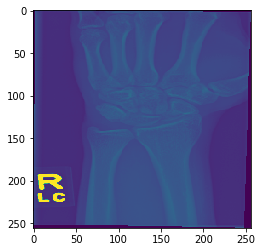

In [7]:
imgplot = plt.imshow(image)

This creates a dictionary where the keys are the filenames, and the values are the processed images flattened into arrays

In [8]:
image_dict = {}
print("Image dictionary:")
for im2 in imlist:
    if im2 != '.DS_Store':
        img_as_flat_array = np.array(Image.open(path2 + '/' + im2))
        img_as_flat_array = img_as_flat_array.flatten()
        img_as_flat_array = img_as_flat_array.astype(int)
        image_dict.update({im2 : img_as_flat_array})
print(image_dict)

Image dictionary:
{'Hand 11.png': array([105, 102,  84, ...,  61,  63,  64]), 'Finger 7.png': array([0, 0, 0, ..., 0, 0, 0]), 'Ankle AP 5.png': array([0, 0, 0, ..., 0, 0, 0]), 'Elbow 12 c.png': array([ 8,  8, 10, ..., 47, 47, 47]), 'Wrist 14.png': array([ 99, 100, 102, ..., 132, 110, 105]), 'Elbow 3.png': array([ 0,  0,  0, ..., 63, 63, 63]), 'Finger 20.png': array([105, 105, 105, ..., 104, 104,   0]), 'Foot 10 l.png': array([25, 25, 25, ..., 85, 85, 85]), 'Knee AP 22.png': array([17, 15, 15, ...,  2,  2,  2]), 'Wrist 3.png': array([ 91,  94, 101, ..., 120, 104,  98]), 'Shoulder 5.png': array([11, 11, 11, ..., 11, 10, 12]), 'Elbow 12.png': array([37, 33, 33, ..., 34, 27, 34]), 'Foot 8.png': array([0, 0, 0, ..., 0, 0, 0]), 'Foot 9.png': array([0, 0, 0, ..., 0, 0, 0]), 'Elbow 13.png': array([0, 0, 0, ..., 0, 0, 0]), 'Shoulder 4.png': array([0, 0, 0, ..., 0, 0, 0]), 'Wrist 2.png': array([4, 4, 4, ..., 3, 4, 4]), 'Knee AP 23.png': array([12, 12, 12, ..., 12, 12, 12]), 'Foot 10 m.png': arra

Now lets create a dictionary of the filenames (keys) and the y-labels of which bones are present (values)

In [9]:
y_label_dict = {}
xray_labels = pd.read_csv('/Users/azamsaied/Desktop/Machine Learning Project/Coding resourses/y_labels.csv')

#Lets ensure consistency with our filename endings:
for i in range(len(xray_labels.index)):
    xr_name = str(xray_labels.iloc[i,0])
    if xr_name[-4:] != '.png':
        nn = xr_name+'.png'
        xray_labels.replace(xr_name, nn, inplace=True)

#Or lets try turning my dataframe into a dictionary:
#1) make the filename the index, #2) Transpose it (to_dict automatically sets column names as keys), #3) Use to_dict to turn the dataframe into a dictionary
xray_dict = xray_labels.set_index('x-ray').T.to_dict('list')
print(xray_dict)

{'Ankle AP 1.png': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Ankle AP 10.png': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,

Now we create a Train / Test split:

In [10]:
X = []
y = []
keys = list(image_dict.keys())
for key in keys:
    X.append(image_dict[key])
    y.append(xray_dict[key])
#Life gets a little easier if X and y are np arrays (lets us change type of number)
X = np.array(X).astype('float32')
X = X / 255
y = np.array(y).astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)
print("X train:", X_train)
print("X_test:", X_test)
print("y_train: ", y_train)
print("y_test: ", y_test)
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
X_train = X_train.reshape((-1, 256, 256, 1))
X_test = X_test.reshape((-1, 256, 256, 1))
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("y.shape: ", y.shape)

X train: [[0.02745098 0.02745098 0.02352941 ... 0.02745098 0.02745098 0.02352941]
 [0.01568628 0.01568628 0.01568628 ... 0.01568628 0.01568628 0.01176471]
 [0.32156864 0.32156864 0.32156864 ... 0.22745098 0.22745098 0.22745098]
 ...
 [0.8039216  0.8039216  0.8039216  ... 0.8039216  0.8039216  0.8039216 ]
 [0.09411765 0.09411765 0.16078432 ... 0.3137255  0.3372549  0.3372549 ]
 [0.09803922 0.09803922 0.09803922 ... 0.02745098 0.02745098 0.02745098]]
X_test: [[0.01568628 0.01568628 0.01568628 ... 0.01568628 0.01568628 0.01960784]
 [0.73333335 0.38039216 0.17254902 ... 1.         0.99215686 0.9843137 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.08235294 0.08235294 0.08235294 ... 0.07843138 0.07843138 0.07843138]
 [0.14117648 0.1254902  0.1254902  ... 0.09803922 0.09803922 0.09803922]
 [0.         0.         0.         ... 0.6313726  0.6039216  0.63529414]]
y_train:  [[0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [0 

In [11]:
X_train_1 = X_train.reshape((-1, 256, 256))
X_test_1 = X_test.reshape((-1, 256, 256))

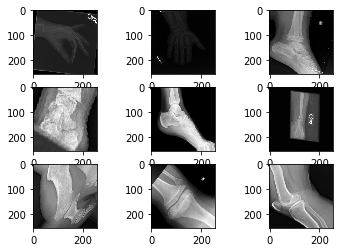

In [12]:
#Practice manipulating and printing images
datagen = ImageDataGenerator(rotation_range=180)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(256, 256), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [13]:
#Lets run our model on non-pre processed images
batch_size = 52
epochs = 4
num_classes = 139 #Number of possible bones as an output

In [14]:
#Build the model
bone_rec_model = Sequential()
bone_rec_model.add(Conv2D(24, kernel_size = (4, 4), input_shape=(256, 256, 1), strides = 2, activation = 'relu'))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(MaxPooling2D((3, 3),padding='same'))
bone_rec_model.add(Conv2D(64, (2, 2), activation='linear',padding='same'))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
bone_rec_model.add(Flatten())
bone_rec_model.add(Dense(128, activation='linear'))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(Dense(num_classes, activation='softmax'))

In [15]:
#Compile the model
bone_rec_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
bone_rec_model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x1a3d221be0>>

In [16]:
#Train the model
bone_rec_train = bone_rec_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, y_test))

Train on 312 samples, validate on 79 samples
Epoch 1/4
312/312 [==============================] - 10s 31ms/step - loss: -172929104325814912.0000 - acc: 0.0000e+00 - val_loss: 51.8276 - val_acc: 0.0000e+00
Epoch 2/4
312/312 [==============================] - 7s 24ms/step - loss: -454930815825652352.0000 - acc: 0.0000e+00 - val_loss: 83.9783 - val_acc: 0.0000e+00
Epoch 3/4
312/312 [==============================] - 8s 25ms/step - loss: -476484588077929728.0000 - acc: 0.0000e+00 - val_loss: 118.0927 - val_acc: 0.0000e+00
Epoch 4/4
312/312 [==============================] - 8s 24ms/step - loss: -476484588077929728.0000 - acc: 0.0000e+00 - val_loss: 134.6123 - val_acc: 0.0000e+00


In [19]:
#Start building a new model - to be used with data augmentation
my_new_model = Sequential()
my_new_model.add(Conv2D(24, kernel_size = (12, 12), input_shape=(256, 256, 1), strides = 2, activation = 'relu'))
my_new_model.add(LeakyReLU(alpha=0.1))
my_new_model.add(MaxPooling2D((2, 2),padding='same'))
my_new_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
my_new_model.add(LeakyReLU(alpha=0.1))
my_new_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
my_new_model.add(Flatten())
my_new_model.add(Dense(128, activation='linear'))
my_new_model.add(LeakyReLU(alpha=0.1))
my_new_model.add(Dense(num_classes, activation='softmax'))

#And compiling it
my_new_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [20]:
#Lets try augmenting the data using the KERAS tutorial
data_generator_with_aug = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=180,
    horizontal_flip=True)
train_generator = data_generator_with_aug.flow(X_train, y_train, batch_size = 100)#, class_mode = 'categorical'
data_generator_no_aug = ImageDataGenerator()
valid_generator = data_generator_no_aug.flow(X_test, y_test, batch_size = 100) #, class_mode = 'categorical')

my_new_model.fit_generator(train_generator, steps_per_epoch = 12, epochs=epochs, validation_data = valid_generator, validation_steps=1)
#X_train, y_train, batch_size=batch_size, , verbose=1,validation_data=(X_test, y_test))

Epoch 1/4


/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:1131: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:1139: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


12/12 [==============================] - 137s 11s/step - loss: -237002442002584512.0000 - acc: 0.0017 - val_loss: 140.0741 - val_acc: 0.0000e+00
Epoch 2/4
12/12 [==============================] - 140s 12s/step - loss: -379721571058531776.0000 - acc: 0.0000e+00 - val_loss: 76.3397 - val_acc: 0.0000e+00
Epoch 3/4
12/12 [==============================] - 117s 10s/step - loss: -379721571058531904.0000 - acc: 0.0017 - val_loss: 75.0659 - val_acc: 0.0000e+00
Epoch 4/4
12/12 [==============================] - 187s 16s/step - loss: -295154436964893568.0000 - acc: 8.5141e-04 - val_loss: 169.0541 - val_acc: 0.0000e+00
